In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:

bank_data = pd.read_csv('./bank-full.csv')

print(len(list(bank_data.columns)))

1


In [31]:
print(list(bank_data.columns))
print(bank_data.size)

['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"']
41188


In [5]:
bank_data.describe()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
count,41188
unique,41176
top,"27;""technician"";""single"";""professional.course""..."
freq,2


In [6]:
# Cleaning data

clean_bank_data = open('./bank-full.csv').read()

data = clean_bank_data.split('\n')

for i in range(0,len(data)):
    data[i] = data[i].replace(';',',')



In [11]:
# with open('./clean-data.csv','w') as file:
#     for i in range(0,len(data)):
#         file.write(data[i] + "\n")

new_bank_data = pd.read_csv('./clean-data.csv')
print(new_bank_data.shape)
print(new_bank_data.info())
print(new_bank_data.columns)
len(list(new_bank_data.columns))

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

21

In [8]:
for i in new_bank_data.columns:
    print(new_bank_data[i].unique())

print(new_bank_data.describe())

age_19_24 = new_bank_data['age'].between(19,24)
age_25_35= new_bank_data['age'].between(25,35)
age_36_45= new_bank_data['age'].between(36,45)
age_46_65= new_bank_data['age'].between(46,65)
age_66_100= new_bank_data['age'].between(66,100)



[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 261  149  226 ... 1246 1556 1868]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19

In [9]:
new_bank_data.loc[age_19_24]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
160,24,management,single,university.degree,no,yes,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
373,22,blue-collar,single,basic.9y,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
568,23,admin.,single,university.degree,no,no,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
583,24,technician,single,professional.course,no,no,yes,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41049,21,student,single,high.school,no,no,no,cellular,oct,tue,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.037,4963.6,yes
41053,23,student,single,high.school,no,no,no,cellular,oct,wed,...,1,3,1,success,-1.1,94.601,-49.5,1.043,4963.6,no
41072,24,student,single,high.school,no,yes,yes,cellular,nov,mon,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.050,4963.6,no
41083,24,technician,single,university.degree,no,yes,yes,cellular,nov,tue,...,3,6,3,failure,-1.1,94.767,-50.8,1.049,4963.6,yes


Text(0.5, 0, 'Customers based on education and housing')

<Figure size 3000x2000 with 0 Axes>

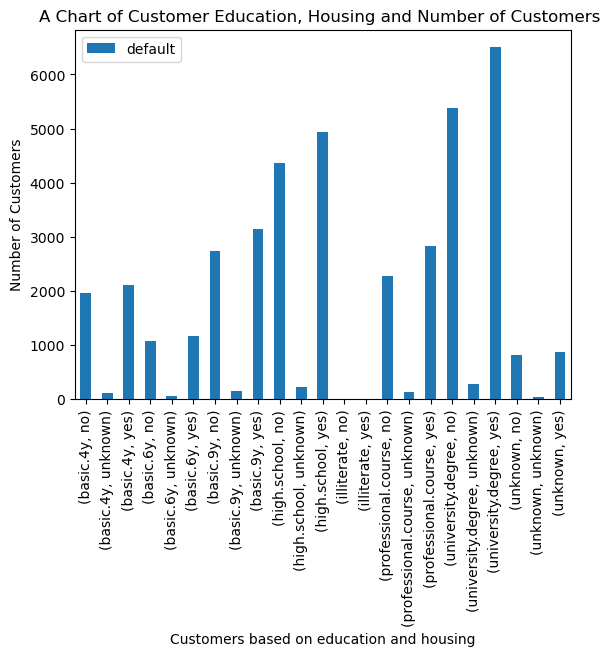

In [36]:
education_loan = new_bank_data.groupby(['education','housing'])[['default']].count()
education = new_bank_data.groupby(['education'])[['default']].count()

plt.figure(figsize=(30,20)) 
education_loan.plot(kind='bar')
plt.title('A Chart of Customer Education, Housing and Number of Customers ')
plt.ylabel('Number of Customers')
plt.xlabel('Customers based on education and housing')

Text(0.5, 0, 'Customers based on education')

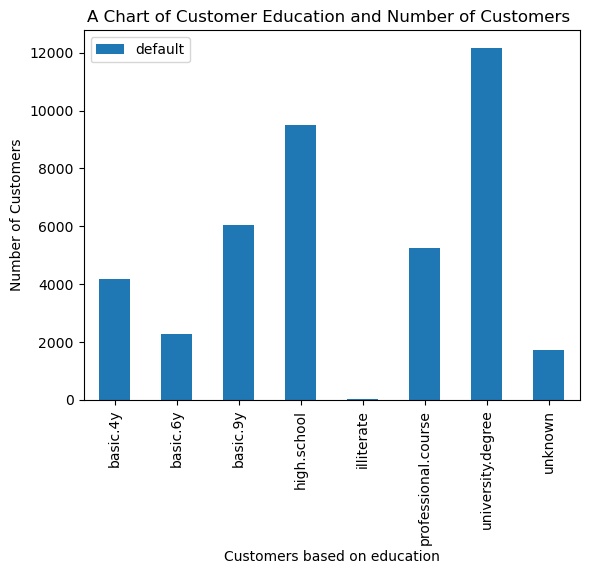

In [30]:
education.plot(kind='bar')
plt.title('A Chart of Customer Education and Number of Customers ')
plt.ylabel('Number of Customers')
plt.xlabel('Customers based on education')

In [19]:
banking_data = new_bank_data.groupby(['job'])[['loan']].count()

banking_data

,loan
job,
admin.,10422
blue-collar,9254
entrepreneur,1456
housemaid,1060
management,2924
retired,1720
self-employed,1421
services,3969
student,875


Text(0, 0.5, 'Number of Customers')

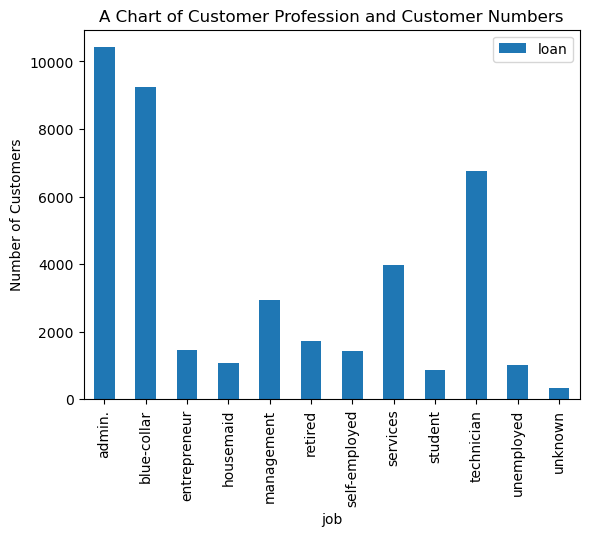

In [26]:
banking_data.plot(kind='bar')
plt.title('A Chart of Customer Profession and Customer Numbers')
plt.ylabel('Number of Customers')

In [11]:
new_bank_data._get_numeric_data()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [12]:
new_bank_data.select_dtypes(['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [13]:
new_bank_data['age'].value_counts(normalize=True)

31    0.047271
32    0.044819
33    0.044503
36    0.043216
35    0.042707
        ...   
89    0.000049
91    0.000049
94    0.000024
87    0.000024
95    0.000024
Name: age, Length: 78, dtype: float64

In [14]:
new_bank_data.query("housing == 'no' and loan == 'no'")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41168,38,entrepreneur,married,university.degree,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [15]:
new_bank_data.nlargest(n=12,columns="nr.employed").loc[:,'job']

7763     management
7764     technician
7765         admin.
7766     technician
7767    blue-collar
7768    blue-collar
7769         admin.
7770      housemaid
7771       services
7772     technician
7773     unemployed
7774     technician
Name: job, dtype: object

In [15]:
correlation_data = new_bank_data.loc[:new_bank_data.shape[0],['age','campaign']]

correlation = correlation_data.groupby(['age'])['campaign'].count()

# correlation_data.insert(loc=1, column=1,value=correlation)
correlation

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: campaign, Length: 78, dtype: int64

<Axes: xlabel='age'>

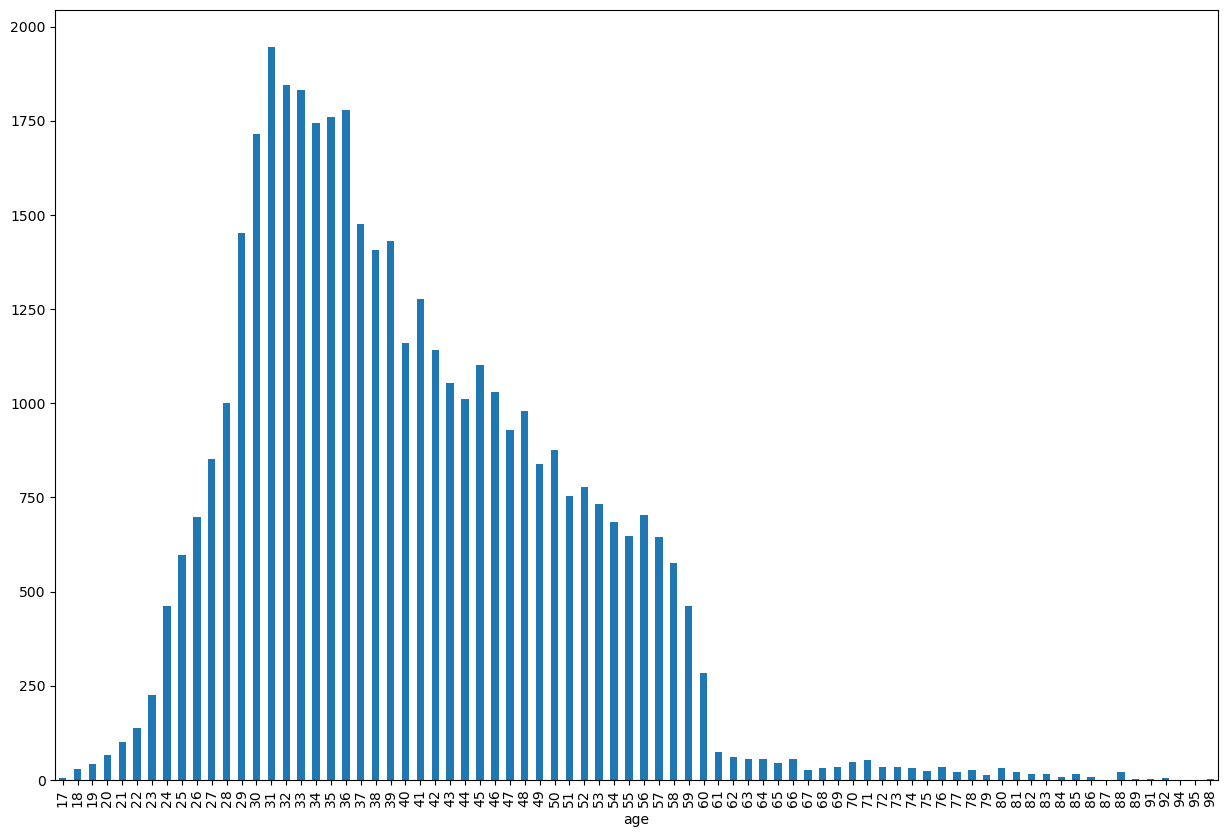

In [17]:
plt.figure(figsize=(15,10))
correlation.plot(kind='bar')

In [17]:
unique_jobs = new_bank_data['job'].unique()
print(unique_jobs)


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [18]:
# for i in unique_jobs:
#     unique_profession = new_bank_data.loc[new_bank_data['job'] == i]
# #     profession = unique_profession.to_csv(f'./{i}')
    
#     print(unique_profession)

In [19]:
new_bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# Chi-Square Test

In [ ]:
# Python Linear Regression
